<h3>Import Modules</h3>

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [12]:
import tensorflow as tf

<h3>1. Types to execute a Session</h3>

<h5>Build the graph</h5>

In [13]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)

<h5>1.1 Type 1</h5>

In [14]:
# sess type 1
sess = tf.Session()
print(sess.run([node1,node2]))
sess.close()

[3.0, 4.0]


<h5>1.2 Type 2</h5>

In [15]:
# sess type 2
with tf.Session() as sess:
    output = sess.run([node1,node2])
    print(output)

[3.0, 4.0]


<h3>2. Example of calculation </h3>

In [16]:
a = tf.constant(5.0)
b = tf.constant(1.5)

c = a*b

sess = tf.Session()
print(sess.run(c))
sess.close()

7.5


<h3> 3. TensorBoard</h3>

In [17]:
File_Writer = tf.summary.FileWriter("tf_graph/",sess.graph)

Execute <b>tensorboard --logdir="."</b> in terminal

<h3>4. Constants</h3>
<p>Constant tensors <b><i>take no input</i></b> from outside, but output whatever they have internally.</p>
<p>So we cannot change or assign them different values.</p>

In [18]:
a = tf.constant(5.0)
b = tf.constant(1.5)

sess = tf.Session()
print(sess.run([a,b]))
sess.close()

[5.0, 1.5]


<h3>5. Placeholders</h3>
<p>A placeholder is a promise to <b>provide the imput later</b>.</p>
<p>This is the case when we want the graph to accept external input.s</p>

In [19]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

add = a+b

sess = tf.Session()
print(sess.run(add,{a:[1,2],b:[10,20]}))
sess.close()

[11. 22.]


<h3> 6. Variables</h3>
<p>Variables are those which <b>allow us to modify or update</b> their values.</p>
<p>Thus in ML, weights and biases are often of type Variable, as they get updated for beter accuracies.</p>

In [20]:
W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)
x = tf.placeholder(tf.float32)

init = tf.global_variables_initializer()

linear_model = W*x + b
sess = tf.Session()
sess.run(init) #run it only after launching the model
print(sess.run(linear_model,{x:[1,2,3,4]}))

[0.         0.3        0.6        0.90000004]


<h3>7. Simple Linear Model</h3>

<p>We don't know how good this model is, till we know the error.</p>
<p><b>Error / Loss</b> is the one which tells how far our model output is, from the actual label or desired outptut</p>
<p> So we will need to calculate the error, update the parameters, check the output, and continue this process till output is optimal</p>

In [21]:
# Model parameters
W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)

# Input
x = tf.placeholder(tf.float32)

# Output
y = tf.placeholder(tf.float32)

# function
linear_model = W*x + b

# Loss
squared_delta = tf.square(y - linear_model)
loss = tf.reduce_sum(squared_delta)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) #run it only after launching the model
sess.run(loss,{x:[1,2,3,4], y:[0,-1,-2,-3]})

23.66

<p> By updating the parameter values, the loss is effected as shown below.</p>

In [22]:
# Model parameters
W = tf.Variable([-1.],tf.float32)
b = tf.Variable([1.],tf.float32)

# Input
x = tf.placeholder(tf.float32)

# Output
y = tf.placeholder(tf.float32)

# function
linear_model = W*x + b

# Loss
squared_delta = tf.square(y - linear_model)
loss = tf.reduce_sum(squared_delta)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) #run it only after launching the model
sess.run(loss,{x:[1,2,3,4], y:[0,-1,-2,-3]})



0.0

<p>To make the machine learn the optimal parameters that could lead the model to give out the output such that the loss is minimum, we need <b>optimizers</b>.</p>
<ul>
<li>An <b>optimizer</b> will check the change in the loss with respect to the change in the variable.</li>

<li>If the loss is decreasing, then it will keep on changing the variable in that particular direction.</li>
</ul>
<p> Let us use the famous <b>gradient descent</b> optimizer here.</p>

In [23]:
# Model parameters
W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)

# Input
x = tf.placeholder(tf.float32)

# Output
y = tf.placeholder(tf.float32)

# function
linear_model = W*x + b

# Loss
squared_delta = tf.square(y - linear_model)
loss = tf.reduce_sum(squared_delta)

# Optimize
optimizer = tf.train.GradientDescentOptimizer(0.01) # learning rate is the parameter
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) #run it only after launching the model
for i in range(1000):
    sess.run(train,{x:[1,2,3,4], y:[0,-1,-2,-3]})
# print(sess.run([W,b]))

a,b = sess.run([W,b])
print("W: "+str(a)+" b:"+str(b))

W: [-0.9999969] b:[0.9999908]


<h3>8. Implementation of Simple Usecase - Level Mine Identifier</h3>

<p>This is the workflow very commonly followed while solving machine learning problems</p><br>
<img src="tf-code-steps.png" alt="WorkFlow" height="100" width="780">

<h5>8.1 Importing necesary libraries</h5>

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

<h5>8.2 Read the data into Pandas dataframe</h5>

In [25]:
def read_dataset():
    df = pd.read_csv("sonar-data-set.csv")
    # X and y are np arrays
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    # Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    #encoder.classes_
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    return X,Y

<h5>8.2 One hot encoding of labels vector</h5>

In [26]:
def one_hot_encode(y):
    n_labels = len(y)
    n_unique_labels = len(np.unique(y))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),y] = 1
    return one_hot_encode

<h5>8.3 Defining the Model</h5>

In [27]:
def multilayer_perceptron(x, weights, biases):
    
    # Hidden layer with sigmoid activated
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activated
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Hidden layer with sigmoid activated
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # Hidden layer with RELU activated
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']+biases['out'])
    return out_layer

<h5>8.3 The Main Function</h5>

In [29]:
# Read the dataset
X, Y = read_dataset()

# Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state = 1)

# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=415)

# Inspect the shape of the training and testing
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

# Define the important parametrs and variables to work with the tensors
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape = [1], dtype=float)
n_dim = X.shape[1]
print("n_dim",n_dim)

n_class = 2
model_path = "./model"

# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32,[None,n_dim]) # None means any value
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_true = tf.placeholder(tf.float32,[None,n_class])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

# Initialize all the variables
init = tf.global_variables_initializer()

#  Saver object to save our model
saver = tf.train.Saver()

# Call your model defined
y = multilayer_perceptron(x, weights, biases)

# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_true))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

# Calculate the cost and accuracy for each epoch

mse_history = []
accuracy_history = []
print("**")
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_true:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_true:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y = sess.run(y,feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy,feed_dict={x: train_x, y_true:train_y})
    accuracy_history.append(accuracy)
    
#     print('epoch: ',epoch,' - ','cost:',cost,' -MSE:',mse_," -Train Accuracy: ",accuracy)
save_path = saver.save(sess, model_path)



('n_dim', 60)
**
(165, 60)
(165, 2)
(42, 60)
(42, 2)


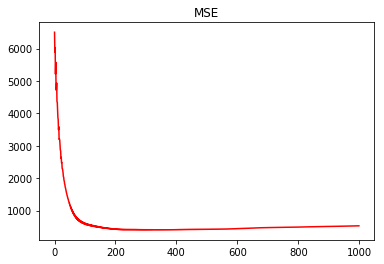

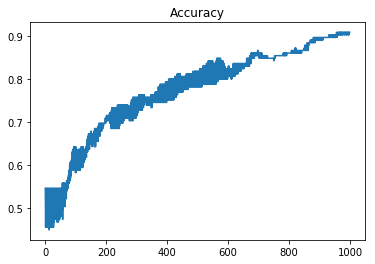

('Test Accuracy: ', 0.71428573)
MSE: 528.6842


In [30]:
# Plot MSE and accuracy graph
plt.title("MSE")
plt.plot(mse_history,'r')
plt.show()
plt.title("Accuracy")
plt.plot(accuracy_history)
plt.show()
    
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x:test_x, y_true:test_y})))

# Print final MSE
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f"%sess.run(mse))

In [31]:
#  Just to understand some of the functions used above

a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
c=tf.equal(tf.argmax(a,0),tf.argmax(b,0))
d=tf.argmax(a,0)
e=tf.reduce_mean(tf.square(a-b))

sess = tf.Session()
print(sess.run(e,feed_dict={a:np.array([1,1,1,1,1,0,0,0,0]),b:np.array([0,1,0,0,0,0,0,0,1])}))
print(sess.run(d,feed_dict={a:np.array([1,1,1,1,1,10,10])}))
sess.run(c,feed_dict={a:np.array([1,1,1,1,1,0,0,0,0]),b:np.array([0,1,0,0,0,0,0,0,1])})

0.5555556
5


False